# Objects!!
An object is just a collection of data (variables) and methods (functions) that act on those data. A class is a blueprint that defines what attributes and methods an object can have. 

## Example: simple class
Here is a class called Person that contains a person's age (attribute) and has the ability to say hello (method).

In [1]:
class Person:
    "This is a person class"
    age = 10

    def greet(self):
        print('Hello')

### Creating an object:
(remember, an object is just an instance of a class)

In [2]:
p = Person()

### Accessing attributes:

In [3]:
print(p.age)

10


### Using methods:

In [4]:
p.greet()

Hello


In [5]:
p.greet

<bound method Person.greet of <__main__.Person object at 0x7ff46aff9b50>>

### Accessing docs:

In [6]:
p.__doc__

'This is a person class'

## Constructors:

In [7]:
class Person:
    "This is a person class"
    def __init__(self, age=17, name='Elliott'):
        self.age = age
        self.name = name

    def greet(self):
        print('Hello')

In [8]:
p = Person()
print(p.name)

Elliott


In [9]:
d = Person(name='Dara',age='26')
print(d.name)

Dara


In [10]:
p.surname = 'Chalcraft'
print(p.__dict__)

{'age': 17, 'name': 'Elliott', 'surname': 'Chalcraft'}


# -------------------------------------------------------------------------------------------

# Stacks

Features:

- Stores aribtrary objects
- LIFO: Last-in-first-out
- Often implemented with lists
- Standard functionality:
  - push: inserts object
  - pop: returns and removes most recently inserted object
  - size: returns number of objects currently in stack
  - isEmpty: Returns True if queue is empty, otherwise returns False
- Can be fixed size or dynamic.

### Task 1:
Make a class Stack() that has the push, pop, size, and isEmpty methods described above. Your stack should have a fixed size - if you call push when the stack is already full, it should raise an error.

In [20]:
class Stack:
    "This is a stack"
    def __init__(self, size=0, isEmpty=True, cap=3):
        self.size = size
        self.isEmpty = isEmpty
        self.cap = cap
        self.data = [None] * cap
    def push(self, val):
        if self.size<self.cap:
            self.data[self.size] = val
            self.size += 1
            self.isEmpty = False
        else:
            raise Exception("You have too many objects.")
    def pop(self):
        if not self.isEmpty:
            self.size -= 1
            x = self.data[self.size]
            self.data[self.size] = None
            if self.size == 0:
                self.isEmpty = True
            return x
        else:
            raise Exception("There's no objects here to pop.")

s = Stack()
s.push("a")
s.push("b")
s.push("c")
print(s.data)
s.push("d")

['a', 'b', 'c']


Exception: You have too many objects.

### Homework task:
Adjust your Stack() class to be dynamic size. Do not use built-in features like "append" - you should construct an array of fixed size, and think about the most efficient way to expand it as more objects are pushed.

In [6]:
class Stack:
    "This is a stack"
    def __init__(self, size = 0, isEmpty = True, isFull = False):
        self.size = size
        self.isEmpty = isEmpty
        self.isFull = isFull
        self.data = [None]
    def push(self, val):
        if self.isFull:
            temp = self.data
            self.data = [None] * (2 * len(self.data))
            for i,x in enumerate(temp):
                self.data[i] = temp[i]
        self.data[self.size] = val
        self.size += 1
        self.isEmpty = False
        if self.size == len(self.data):
            self.isFull = True         
    def pop(self):
        if not self.isEmpty:
            self.size -= 1
            x = self.data[self.size]
            self.data[self.size] = None
            if self.size == 0:  
                self.isEmpty = True
            return x
        else:
            raise Exception("There's no objects here to pop.")
            
s = Stack()
print(s.data)
s.push("a")
print(s.data)
s.push("b")
print(s.data)
s.push("c")
print(s.data)
s.pop()
print(s.data)

[None]
['a']
['a', 'b']
['a', 'b', 'c', None]
['a', 'b', None, None]


In [1]:
x = []
print(x)

[]


# Queues

Features:

- Stores arbitrary objects
- FIFO - First-in-first-out
- Standard functionality:
  - Enqueue: inserts object
  - Dequeue: Returns and removes first inserted object
  - size: Returns number of objects in queue
  - isEmpty: Returns True if queue is empty, otherwise returns False
- Should be dynamic in size

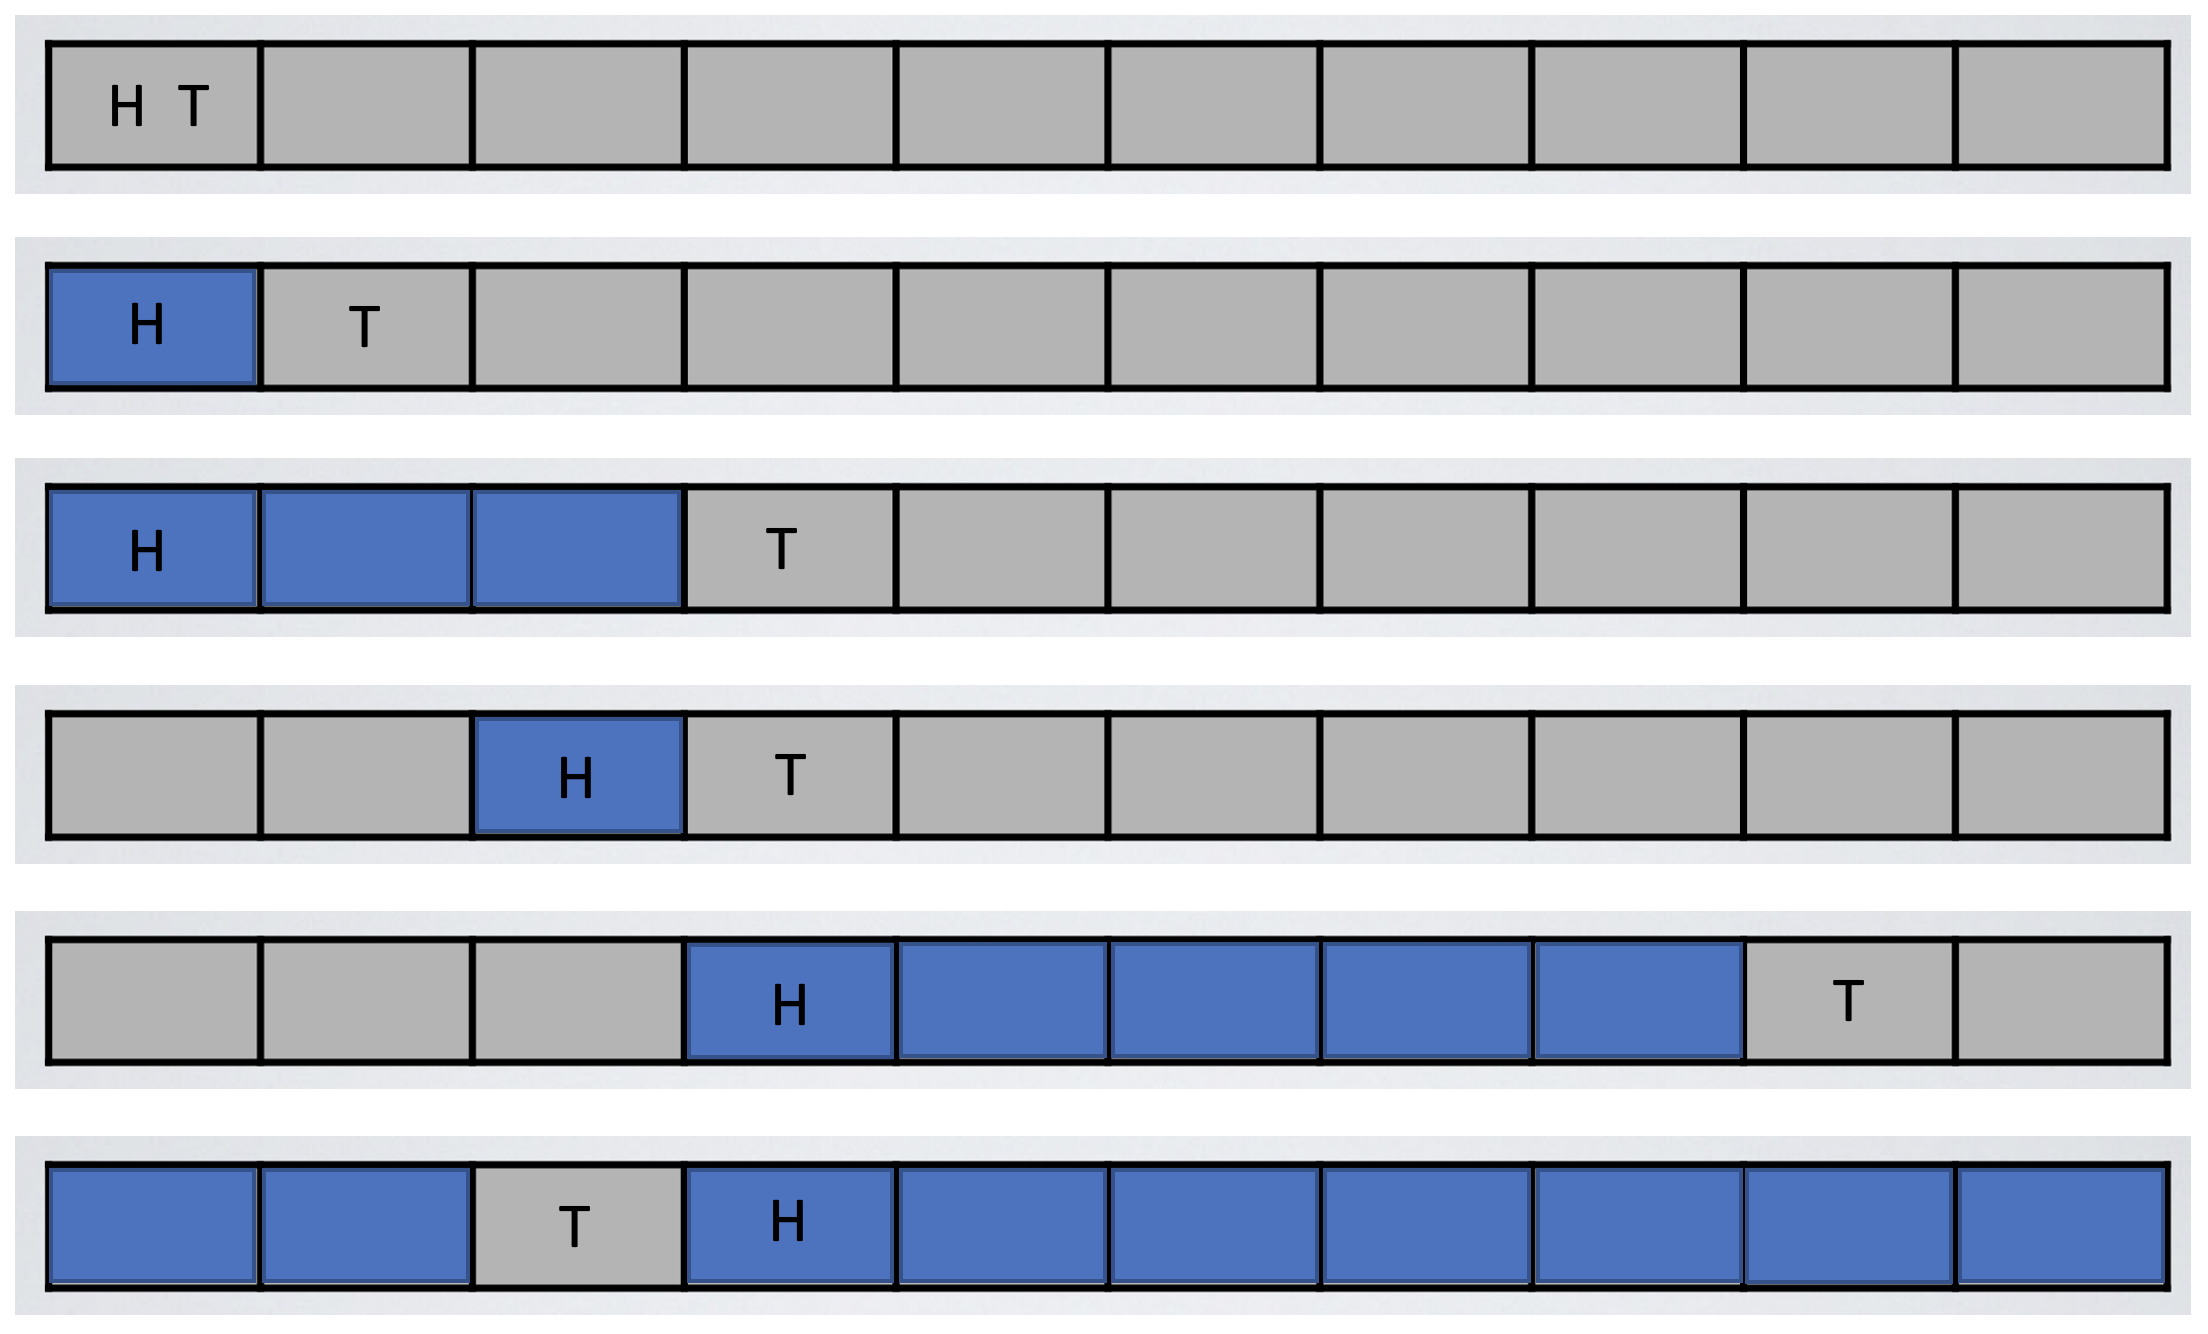

In [21]:
from IPython.display import Image
Image(filename='Files/queueDiagram.png',width=600)

### Homework Task
Make a class Queue() that has the enqueue, dequeue, size, and isEmpty methods described above. Let your queue wrap as shown in the diagram above until it is full - then, expand the array and rearrange your objects to be in the correct order starting at the beginning.

In [164]:
class Queue:
    "This is a queue"
    def __init__(self, size = 0, isEmpty = True):
        self.size = size
        self.isEmpty = isEmpty
        self.data = [None]
        self.head = 0
        self.tail = 0
    def enqueue(self, val):
        if None not in self.data:
            temp = self.data
            self.data = [None] * (2 * len(self.data))
            start = self.head
            for i,_ in enumerate(temp):
                self.data[i] = temp[start%len(temp)]
                start += 1
            self.head = 0
            self.tail = len(temp)
        elif self.tail > len(self.data)-1:
            self.tail = 0
        self.data[self.tail] = val
        self.tail += 1
        self.isEmpty = False
        self.size += 1
    def dequeue(self):
        if not self.isEmpty:
            self.data[self.head] = None
            self.head = (self.head+1)%len(self.data)
            if self.data[self.head] == None:
                self.isEmpty = True
            self.size -= 1
        else:
            raise Exception("There's no objects here to dequeue.")

q = Queue()
q.enqueue("a")
print(q.data)
q.enqueue("b")
print(q.data)
q.enqueue("c")
print(q.data)
q.dequeue()
print(q.data)
q.enqueue("d")
print(q.data)
q.enqueue("e")
print(q.data)
print(q.__dict__)
q.enqueue("f")
print(q.data)
print(q.__dict__)


['a']
['a', 'b']
['a', 'b', 'c', None]
[None, 'b', 'c', None]
[None, 'b', 'c', 'd']
['e', 'b', 'c', 'd']
{'size': 4, 'isEmpty': False, 'data': ['e', 'b', 'c', 'd'], 'head': 1, 'tail': 1}
['b', 'c', 'd', 'e', 'f', None, None, None]
{'size': 5, 'isEmpty': False, 'data': ['b', 'c', 'd', 'e', 'f', None, None, None], 'head': 0, 'tail': 5}


In [124]:
thing = ["a","b","c"]
start = 2
for _ in thing:
    print(start%len(thing))
    start += 1

2
0
1


# Dictionaries

Features:
- Stores arbitrary objects
- Objects (values) are accessed by associated keys
- All keys are distinct and unordered
- Values are changeable

In [165]:
dara = {
    'Name': 'Dara',
    'Age': 26,
    'Siblings': ['Alex','Tim'],
    'Pets': {'Dogs': ['Maisie','Phoebe'], 'Cats': None}
}

In [166]:
elliott = {
    'Name': 'Elliott',
    'Age': 17,
    'Siblings': ['Dylan'],
    'Pets': {'Dogs': None, 'Cats': ['Beans']}
}

In [167]:
print(dara.keys())
print(dara['Name'])
print(dara['Pets']['Dogs'])

dict_keys(['Name', 'Age', 'Siblings', 'Pets'])
Dara
['Maisie', 'Phoebe']


In [168]:
dara['Profession'] = 'Graduate Student'
print(dara.keys())

dict_keys(['Name', 'Age', 'Siblings', 'Pets', 'Profession'])


In [169]:
dara['Name'] = 'Dara Storer'
print(dara['Name'])

Dara Storer


# Sets

Features:
- Stores arbitrary objects
- Values are distinct and unordered
- Values are unchangeable

In [ ]:
fruit = {'bananas','apples','strawberries'}

In [ ]:
print(fruit[0])

In [ ]:
if 'bananas' in fruit:
    print('Yay, I love bananas')

In [ ]:
fruit.add('kiwis')
fruit.remove('apples')
print(fruit)

# -------------------------------------------------------------------------------------------

# Example Problem

Build a class Circle( ) with the following parameters and methods:
- Parameters:
  - Radius
  - Circumference
  - Area
  - History: A dictionary tracking all changes made to the size of the circle. The keys should be the time the change was made, and values are the new size. You can use any parameter you want to track the size, but it needs to be consistent for all entries to the history dictionary.
- Methods:
 - calcRadius(self): calculates and returns the radius of the circle, and updates the radius parameter
 - calcCircumference(self): calculates and returns the circumference of the circle, and updates the circumference parameter
 - calcArea(self): calculates and returns the area of the circle, and updates the area parameter
 - expand(self, parameter, factor): Takes any parameter and multiplies it by factor. Updates that parameter, and appropriately scales any other parameters that are not None.

All of your parameters should have the default value None. If any of your methods are called while all parameters are still None, they should raise an error. If any parameter is known, the methods should run.

Here's an example of how to get the current time:

In [ ]:
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print(current_time)